# COVID Data Visualization
## Source: https://github.com/owid/covid-19-data/tree/master/public/data

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [18, 11]
import plotly.express as px
import plotly.io as pio
pio.kaleido.scope.mathjax = None
from plotly.subplots import make_subplots
from IPython.display import Image


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv',parse_dates=['date'])

In [3]:
df.head()

iso_code continent     location       date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan 2020-02-24          5.0        5.0   
1      AFG      Asia  Afghanistan 2020-02-25          5.0        0.0   
2      AFG      Asia  Afghanistan 2020-02-26          5.0        0.0   
3      AFG      Asia  Afghanistan 2020-02-27          5.0        0.0   
4      AFG      Asia  Afghanistan 2020-02-28          5.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         NaN                  NaN  ...   
1                 NaN           NaN         NaN                  NaN  ...   
2                 NaN           NaN         NaN                  NaN  ...   
3                 NaN           NaN         NaN                  NaN  ...   
4                 NaN           NaN         NaN                  NaN  ...   

   female_smokers  male_smokers  handwashing_facilities  \
0             NaN           NaN                  37.746   
1             NaN           NaN                  37.746   
2             NaN           NaN                  37.746   
3             NaN           NaN                  37.746   
4             NaN           NaN                  37.746   

   hospital_beds_per_thousand  life_expectancy  human_development_index  \
0                         0.5            64.83                    0.511   
1                         0.5            64.83                    0.511   
2                         0.5            64.83                    0.511   
3                         0.5            64.83                    0.511   
4                         0.5            64.83                    0.511   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 65 columns]

In [4]:
df.describe()

total_cases      new_cases  new_cases_smoothed  total_deaths  \
count  1.157200e+05  115716.000000       114702.000000  1.049030e+05   
mean   1.446661e+06    6456.177253         6477.595538  3.661168e+04   
std    9.678926e+06   39316.502269        38921.645029  2.181285e+05   
min    1.000000e+00  -74347.000000        -6223.000000  1.000000e+00   
25%    2.010000e+03       3.000000            9.286000  6.900000e+01   
50%    2.091500e+04      92.000000          115.143000  6.060000e+02   
75%    2.151780e+05     927.000000          979.286000  5.219500e+03   
max    2.367707e+08  905948.000000       826439.429000  4.834539e+06   

          new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  105056.000000        114702.000000            115111.000000   
mean      144.959545           132.140610             17908.416702   
std       790.090703           739.720215             30432.327171   
min     -1918.000000          -232.143000                 0.001000   
25%         0.000000             0.000000               350.045000   
50%         2.000000             1.714000              2740.243000   
75%        19.000000            15.857000             21695.123000   
max     17977.000000         14722.857000            219441.917000   

       new_cases_per_million  new_cases_smoothed_per_million  \
count          115107.000000                   114098.000000   
mean               83.701276                       83.674136   
std               195.069272                      164.054384   
min             -3125.829000                     -272.971000   
25%                 0.281000                        1.552000   
50%                10.718000                       14.774500   
75%                81.549500                       91.018000   
max              8620.690000                     3385.473000   

       total_deaths_per_million  ...  female_smokers  male_smokers  \
count             104307.000000  ...    84223.000000  83001.000000   
mean                 374.085743  ...       10.591883     32.739837   
std                  631.860006  ...       10.504478     13.506090   
min                    0.001000  ...        0.100000      7.700000   
25%                   10.287000  ...        1.900000     21.600000   
50%                   69.119000  ...        6.300000     31.400000   
75%                  453.362000  ...       19.300000     41.100000   
max                 5982.749000  ...       44.000000     78.100000   

       handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
count            54206.000000                98080.000000    115654.000000   
mean                50.736667                    3.023250        73.259580   
std                 31.752969                    2.452736         7.540003   
min                  1.188000                    0.100000        53.280000   
25%                 19.351000                    1.300000        67.920000   
50%                 49.839000                    2.400000        74.620000   
75%                 82.502000                    3.861000        78.740000   
max                100.000000                   13.800000        86.750000   

       human_development_index  excess_mortality_cumulative_absolute  \
count            107978.000000                           4322.000000   
mean                  0.726462                          28164.447617   
std                   0.150210                          82695.599668   
min                   0.394000                         -31959.400000   
25%                   0.602000                           -265.500000   
50%                   0.744000                           1266.100000   
75%                   0.848000                          17289.675000   
max                   0.957000                         693243.800000   

       excess_mortality_cumulative  excess_mortality  \
count                  4322.000000       4322.000000   
mean                      8.037462         15.032927   


In [5]:
death_country = df[['new_deaths','location']]\
                    .drop(df[df.location == 'World'].index)\
                    .groupby('location')\
                    .sum()\
                    .sort_values('new_deaths',ascending=False)
# death_country = death_country[(death_country['location'] != 'World')]
fig = px.bar(death_country.reset_index(), x="new_deaths", y="location",
             color='location', 
             hover_data=["new_deaths", "location"],
             title=f'Deaths due to covid from {df.date.min().date()} to {df.date.max().date()}',
             labels={'new_deaths':'Total Deaths','location':'Country'},
             orientation='h')
fig.show()

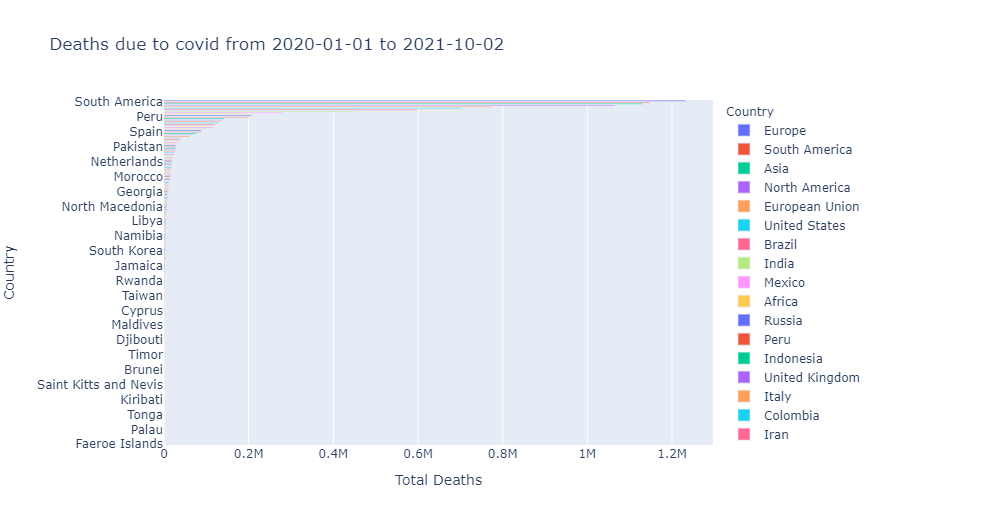

In [6]:
Image(filename="figures/total_deaths.png")

In [7]:
df_2020 = df[(df['date'] > '2020-01-01') & (df['date'] < '2020-12-31')]
df_2020_italy = df_2020[df_2020['location'] == 'Italy']
df_2020_italy.head()
subfig = make_subplots(specs=[[{"secondary_y": True}]])

# create two independent figures with px.line each containing data from multiple columns
fig = px.line(df_2020_italy,x="date", y="new_cases", render_mode="webgl",)
fig2 = px.line(df_2020_italy,x="date", y="total_cases", render_mode="webgl",)

fig2.update_traces(yaxis="y2")

subfig.add_traces(fig.data + fig2.data)
subfig.layout.xaxis.title="Date"
subfig.layout.yaxis.title="New cases"
# subfig.layout.yaxis2.type="log"
subfig.layout.yaxis2.title="Total Cases"
subfig.layout.title ='Daily Covid Cases (New & Cummulative) in Italy'
# recoloring is necessary otherwise lines from fig und fig2 would share each color
# e.g. Linear-, Log- = blue; Linear+, Log+ = red... we don't want this
subfig.for_each_trace(lambda t: t.update(line=dict(color=t.marker.color)))
subfig.show()

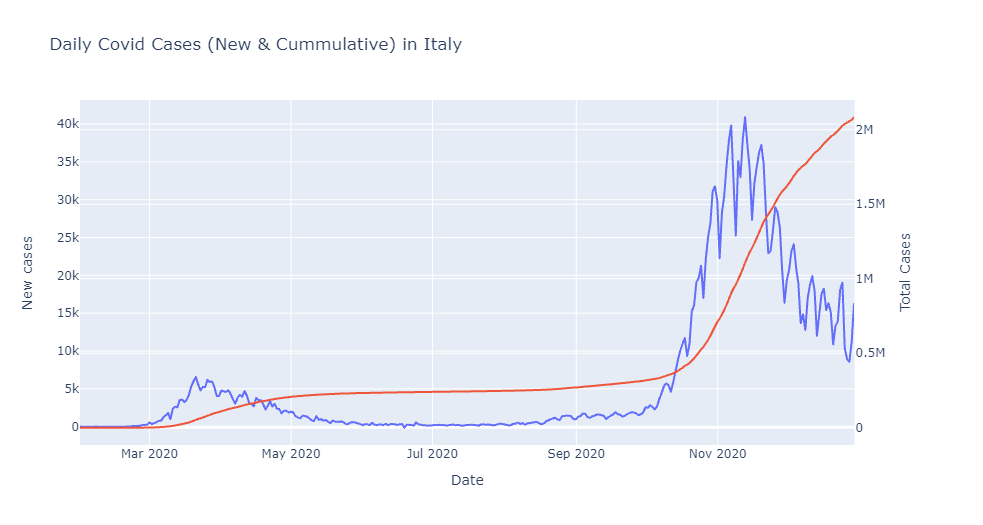

In [8]:
Image(filename="figures/daily_cases_italy.png")

In [9]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
def filter_by_date(start_date,end_date):
    df_filtered = df[(df['date'] >= str(start_date)) & (df['date'] <= str(end_date))]
    df_filtered.to_csv('data/filtered_date.csv')
#     return df_filtered

def filter_by_country(columns):
#     df_date_filtered = pd.read_csv('data/filtered_date.csv',parse_dates=['date'])
    df_location_filtered = df_date_filtered[(df_date_filtered['location'].isin(columns))]
    df_location_filtered.to_csv('data/filtered_location.csv')
#     return df_location_filtered
    
interact(filter_by_date,
        start_date=widgets.DatePicker(value=df.date.min().date(),description='From'),
        end_date=widgets.DatePicker(value=df.date.max().date(),description='To'))

df_date_filtered = pd.read_csv('data/filtered_date.csv',parse_dates=['date'])
interact(filter_by_country,
        columns = widgets.SelectMultiple(
            options=df_date_filtered['location'].unique(),
            value=['United States'],
            #rows=10,
            description='Country',
            disabled=False))

interactive(children=(DatePicker(value=datetime.date(2020, 1, 1), description='From'), DatePicker(value=dateti…

interactive(children=(SelectMultiple(description='Country', index=(221,), options=('Afghanistan', 'Africa', 'A…

<function __main__.filter_by_country(columns)>

In [10]:
df_filtered = pd.read_csv('data/filtered_location.csv',parse_dates=['date'])
df_filtered = df_filtered.loc[:,~df_filtered.columns.str.match("Unnamed")]

In [11]:
fig = px.bar(df_filtered.resample('W', on='date').agg({'new_cases': np.sum, 'positive_rate': np.mean}).reset_index(), 
             x='date', y='new_cases', color='positive_rate',
             labels={'new_cases':'Daily new cases','date':'Date','positive_rate':'Test Positivity Rate'}, 
             title=f'Weekly new cases in {df_filtered.location.unique()[0]}')
fig.show()

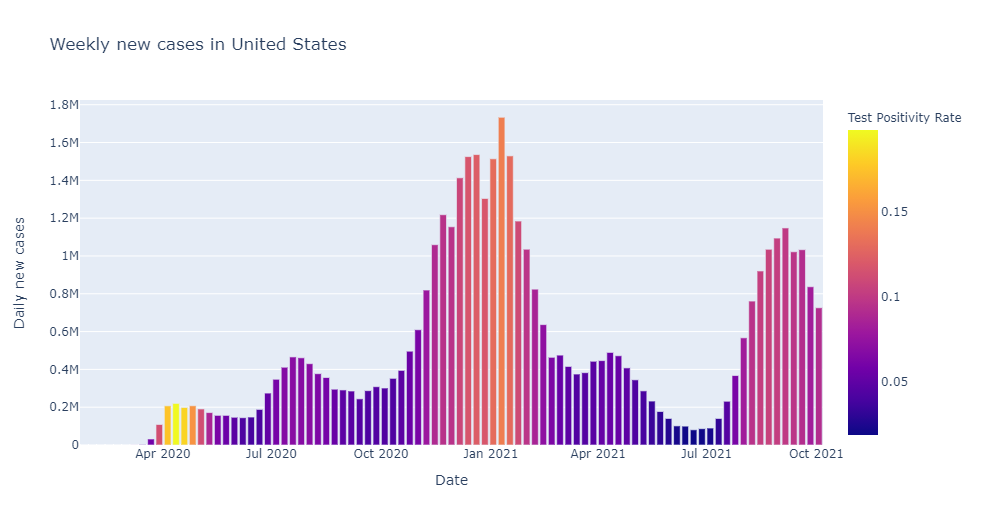

In [12]:
Image(filename="figures/weekly_usa.png")

In [13]:
df_europe = df[(df['continent'].isin(['Europe']))]

In [14]:
fig = px.area(df_europe, x="date", y="total_deaths", color="location",
             labels={'total_deaths':'Total Deaths'},
             title="Trend of total deaths in Europe")
fig.show()

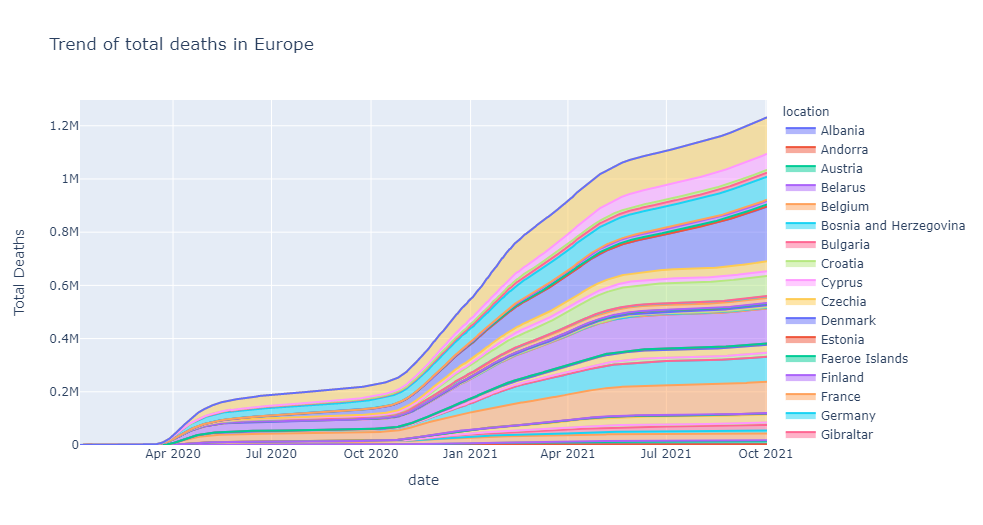

In [15]:
Image(filename="figures/total_deaths_europe.png")

In [16]:
df_top10 = df[(df['location'].isin(['France','Germany','United Kingdom','United States','India','Italy','China','Russia','Spain','Brazil']))]
df_smoking = df_top10.groupby('location').agg({'male_smokers': np.mean, 'female_smokers': np.mean,'population': np.mean,'new_deaths': np.sum,'median_age': np.mean}).reset_index()
df_smoking['male_smoking_population'] = df_smoking['male_smokers']*df['population']/100
df_smoking['female_smoking_population'] = df_smoking['female_smokers']*df['population']/100
df_smoking['smoking_population'] = df_smoking['male_smoking_population'] + df_smoking['female_smoking_population']

In [17]:
fig = px.bar(df_smoking.sort_values('population',ascending=False), 
             x="location", y="population",
            color='smoking_population',
            labels={'smoking_population':'Smoking Population',
                    'location':'Country','population':'Population'},
            title="Top 10 Countries: Population of Smokers")

fig.show()

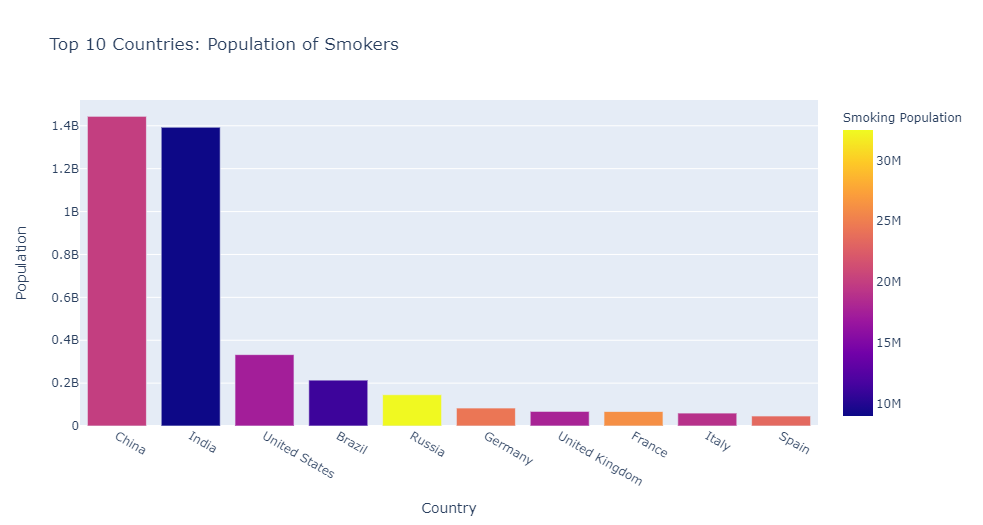

In [18]:
Image(filename="figures/population_smoking.png")

In [19]:
fig = px.bar(df_smoking.sort_values('new_deaths'), 
             x="location", y="new_deaths",
            color='median_age',
             hover_data=['population'],
            labels={'location':'Country',
                    'median_age':'Median Age',
                    'new_deaths':'Total Deaths'},
            title="Deaths and Median-Age comparison")

fig.show()

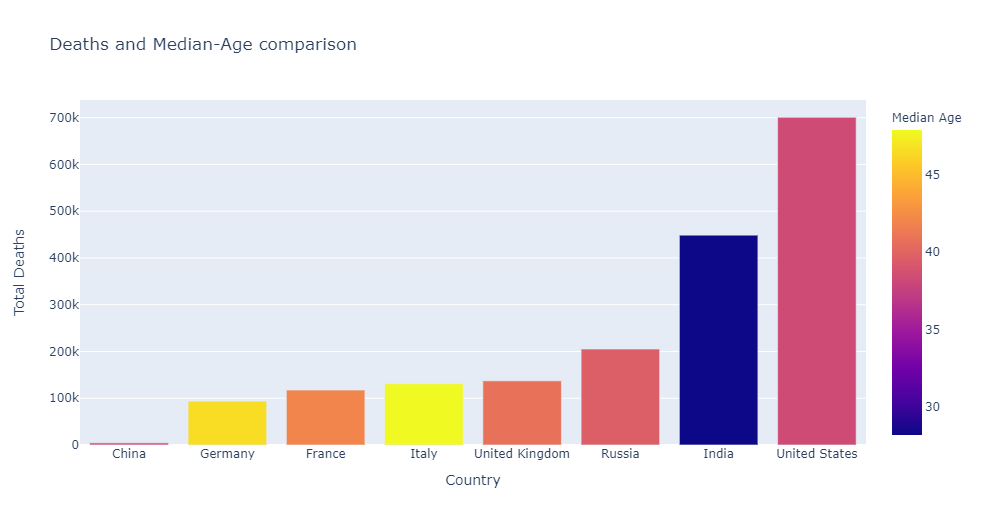

In [20]:
Image(filename="figures/deaths_median_age.png")

In [21]:
df_norm_smoking = df_smoking[['location','new_deaths','population','smoking_population']]
df_norm_smoking = df_norm_smoking.set_index('location')
df_norm_smoking = (df_norm_smoking - df_norm_smoking.min()) / (df_norm_smoking.std())
df_norm_smoking = df_norm_smoking.reset_index()
df_death_smoking = pd.melt(df_norm_smoking[['location','new_deaths','population','smoking_population']],id_vars=['location','population'])

In [22]:
df_death_smoking['variable'] = df_death_smoking['variable'].map({'new_deaths':'Total Deaths',
                                  'smoking_population':'Smoking Population'})

In [23]:
fig = px.bar(df_death_smoking, x="location", color="variable",
             y='value',
             title="Link of smoking to Covid Deaths",
             barmode='relative',
            labels={'location':'Country',
                    'value':'Normalized value',
                    'variable':'Total Deaths'},
            )

fig.show()

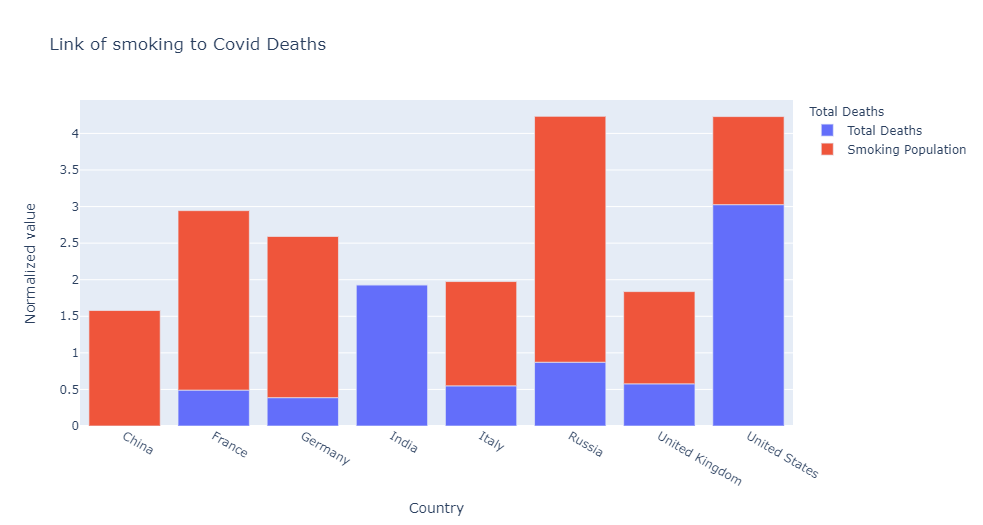

In [24]:
Image(filename="figures/smoking_deaths.png")

In [105]:
df_top10_tot_deaths = df_top10.groupby(['iso_code','location']).agg({'total_deaths':np.max}).reset_index().dropna(axis=0)
fig = px.scatter_geo(df_top10_tot_deaths, 
                     locations='iso_code',
                     color='location',
                     size='total_deaths',
                     hover_name='location',
                     projection="natural earth",
                     labels={'total_deaths':'Total Deaths','location':'Country'}
                    )
fig.show()

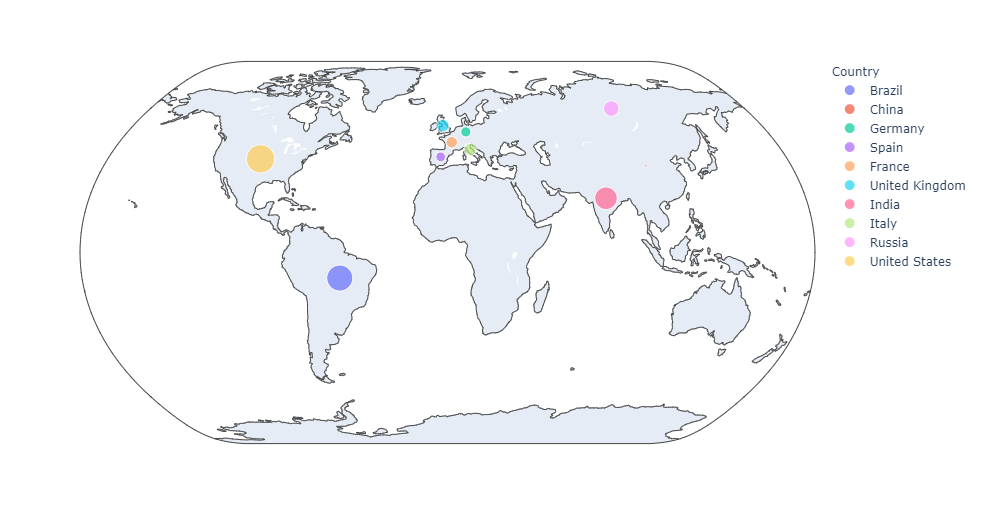

In [107]:
Image(filename="figures/natural_earth.png")

In [115]:
df_top10_2020 =  df_top10[(df_top10['date'] > '2020-03-01') & (df_top10['date'] < '2020-12-31')]

fig = px.area(df_top10_2020,x='date',y='new_cases_smoothed_per_million',
              color='location',
              labels={'date':'Date',
                      'new_cases_smoothed_per_million':'New cases per 1 million people',
                      'location':'Country'}
             )
fig.show()

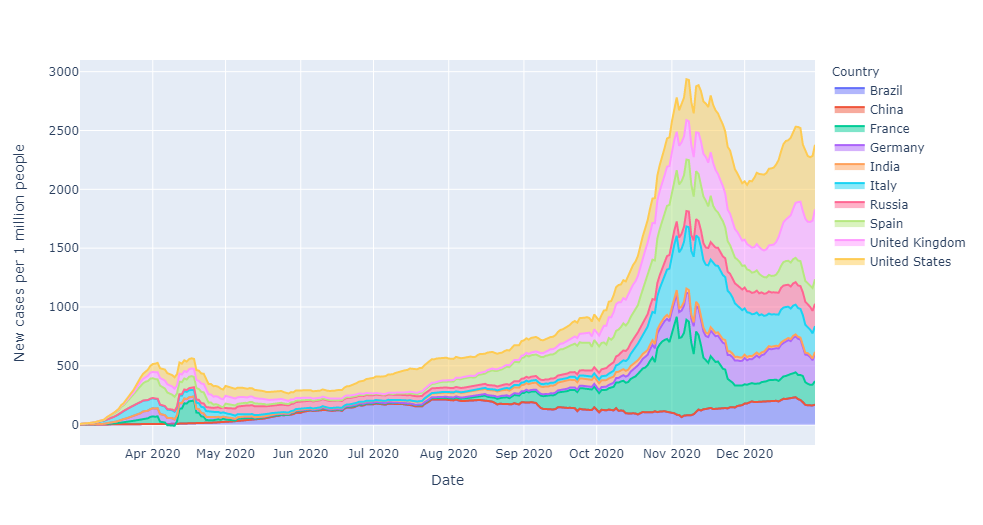

In [127]:
Image(filename="figures/new_cases_per_million.png")

In [123]:
df_top10_2021_usa = df_top10[(df_top10['date'] >= '2021-01-01') & (df_top10['date'] < '2021-10-05')]
df_top10_2021_usa = df_top10_2021_usa[(df_top10_2021_usa['location'].isin(['United States']))]
df_top10_2021_usa.index = df_top10_2021_usa['date']
df_top10_2021_usa_weekly = df_top10_2021_usa.resample('W').mean()
fig = px.bar(df_top10_2021_usa_weekly,x=df_top10_2021_usa_weekly.index,
             y=['new_cases_smoothed_per_million','icu_patients_per_million'],
              labels={'date':'Date',
                      'new_cases_smoothed_per_million':'New cases per 1 million people',
                      'location':'Country'}
             )
fig.show()

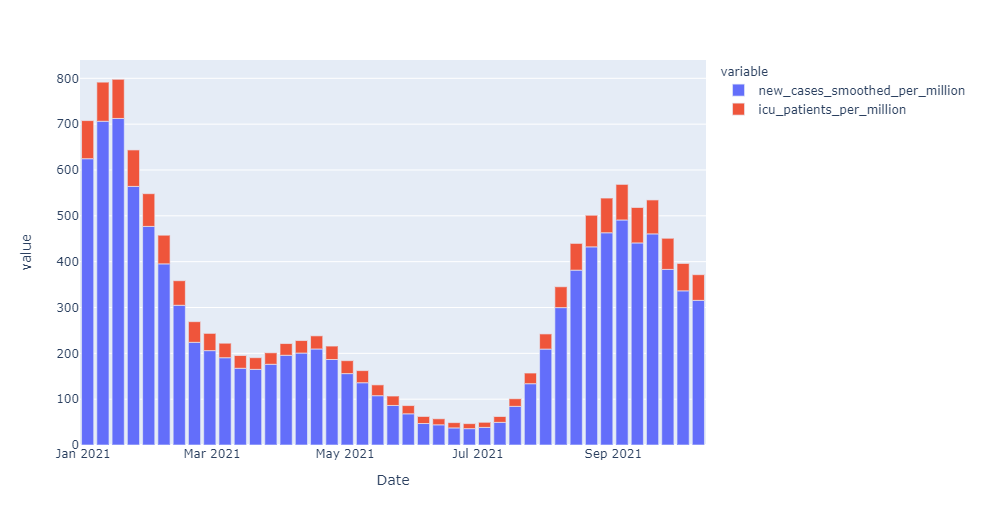

In [128]:
Image(filename="figures/icu_cases_per_million.png")